# Explore here

It's recommended to use this notebook for exploration purposes.

In [1]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns  
import pandas as pd

In [2]:
# select the webpage url to scrape data from
tesla_url = "https://companies-market-cap-copy.vercel.app/index.html"

In [3]:
# request to download the efile from the internet
response = requests.get(tesla_url)

In [4]:
# if the request was executed correctly, parse it using BeautifulSoup
if response.status_code == 200:
    web_content = BeautifulSoup(response.text, 'html.parser')
else:
    print(f"Error, the web content was not received, the error code is {response.status_code}")

In [5]:
# find the table with the year evolution
table = web_content.find("table")
print(table)

<table class="table" style="width:100%">
<thead>
<tr>
<th>Year</th>
<th>Revenue</th>
<th>Change</th>
</tr>
</thead>
<tbody>
<tr><td><span class="year">2024</span></td><td>$97.15 B</td><td class="percentage-green">0.39%</td></tr><tr><td><span class="year">2023</span> </td><td>$96.77 B</td><td class="percentage-green">18.8%</td></tr><tr><td><span class="year">2022</span></td><td>$81.46 B</td><td class="percentage-green">51.35%</td></tr><tr><td><span class="year">2021</span></td><td>$53.82 B</td><td class="percentage-green">70.67%</td></tr><tr><td><span class="year">2020</span></td><td>$31.53 B</td><td class="percentage-green">28.31%</td></tr><tr><td><span class="year">2019</span></td><td>$24.57 B</td><td class="percentage-green">14.52%</td></tr><tr><td><span class="year">2018</span></td><td>$21.46 B</td><td class="percentage-green">82.51%</td></tr><tr><td><span class="year">2017</span></td><td>$11.75 B</td><td class="percentage-green">67.98%</td></tr><tr><td><span class="year">2016</span

In [6]:
# obtain all rows of the data skipping the header row
rows = table.find_all("tr")[1:]
print(rows)

[<tr><td><span class="year">2024</span></td><td>$97.15 B</td><td class="percentage-green">0.39%</td></tr>, <tr><td><span class="year">2023</span> </td><td>$96.77 B</td><td class="percentage-green">18.8%</td></tr>, <tr><td><span class="year">2022</span></td><td>$81.46 B</td><td class="percentage-green">51.35%</td></tr>, <tr><td><span class="year">2021</span></td><td>$53.82 B</td><td class="percentage-green">70.67%</td></tr>, <tr><td><span class="year">2020</span></td><td>$31.53 B</td><td class="percentage-green">28.31%</td></tr>, <tr><td><span class="year">2019</span></td><td>$24.57 B</td><td class="percentage-green">14.52%</td></tr>, <tr><td><span class="year">2018</span></td><td>$21.46 B</td><td class="percentage-green">82.51%</td></tr>, <tr><td><span class="year">2017</span></td><td>$11.75 B</td><td class="percentage-green">67.98%</td></tr>, <tr><td><span class="year">2016</span></td><td>$7.00 B</td><td class="percentage-green">73.01%</td></tr>, <tr><td><span class="year">2015</span>

In [7]:
# strip the data from the table
data = [[col.text.strip() for col in row.find_all("td")] for row in rows]
print(data)

[['2024', '$97.15 B', '0.39%'], ['2023', '$96.77 B', '18.8%'], ['2022', '$81.46 B', '51.35%'], ['2021', '$53.82 B', '70.67%'], ['2020', '$31.53 B', '28.31%'], ['2019', '$24.57 B', '14.52%'], ['2018', '$21.46 B', '82.51%'], ['2017', '$11.75 B', '67.98%'], ['2016', '$7.00 B', '73.01%'], ['2015', '$4.04 B', '26.5%'], ['2014', '$3.19 B', '58.85%'], ['2013', '$2.01 B', '387.23%'], ['2012', '$0.41 B', '102.34%'], ['2011', '$0.20 B', '74.95%'], ['2010', '$0.11 B', '4.29%'], ['2009', '$0.11 B', '']]


In [8]:
# store the data in a dataframe
data_df = pd.DataFrame(data, columns=["Date", "Revenue", "Percentage_Change"])
print(data_df)

    Date   Revenue Percentage_Change
0   2024  $97.15 B             0.39%
1   2023  $96.77 B             18.8%
2   2022  $81.46 B            51.35%
3   2021  $53.82 B            70.67%
4   2020  $31.53 B            28.31%
5   2019  $24.57 B            14.52%
6   2018  $21.46 B            82.51%
7   2017  $11.75 B            67.98%
8   2016   $7.00 B            73.01%
9   2015   $4.04 B             26.5%
10  2014   $3.19 B            58.85%
11  2013   $2.01 B           387.23%
12  2012   $0.41 B           102.34%
13  2011   $0.20 B            74.95%
14  2010   $0.11 B             4.29%
15  2009   $0.11 B                  


In [9]:
# remove the '$' and the 'B' from the dataframe
data_df['Revenue'] = data_df['Revenue'].str.replace("[$B]", "", regex=True).astype(float)
print(data_df)

    Date  Revenue Percentage_Change
0   2024    97.15             0.39%
1   2023    96.77             18.8%
2   2022    81.46            51.35%
3   2021    53.82            70.67%
4   2020    31.53            28.31%
5   2019    24.57            14.52%
6   2018    21.46            82.51%
7   2017    11.75            67.98%
8   2016     7.00            73.01%
9   2015     4.04             26.5%
10  2014     3.19            58.85%
11  2013     2.01           387.23%
12  2012     0.41           102.34%
13  2011     0.20            74.95%
14  2010     0.11             4.29%
15  2009     0.11                  


In [10]:
# connect to the database
connection = sqlite3.connect('"tesla_revenues.db"')
cursor = connection.cursor()

In [11]:
# Create the revenues table in the database
cursor.execute("""
CREATE TABLE IF NOT EXISTS revenue (
    date TEXT,
    revenue REAL
)
""")

In [12]:
# insert the values from the dataframe into the revenue table
data_list = data_df[["Date", "Revenue"]].values.tolist()
cursor.executemany("INSERT INTO revenue (date, revenue) VALUES (?, ?)", data_list)

In [13]:
# store (commit) the changes you have made to the database
connection.commit()
connection.close()

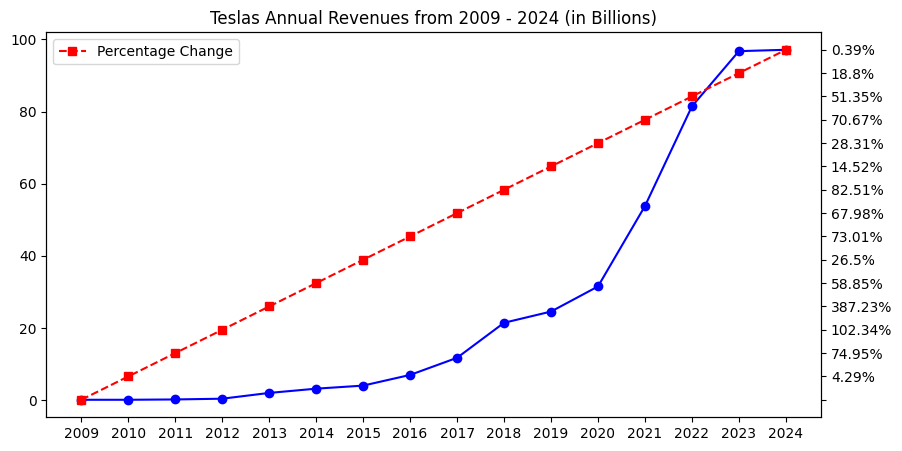

In [14]:
data_df = data_df.sort_values('Date')

plt.figure(figsize=(10, 5))
plt.plot(data_df['Date'], data_df['Revenue'], marker='o', label='Revenue', color='b')

plt.twinx()
plt.plot(data_df['Date'], data_df['Percentage_Change'], marker='s', linestyle='dashed', label='Percentage Change', color='r')

plt.title('Teslas Annual Revenues from 2009 - 2024 (in Billions)')
plt.xlabel('Year')
plt.legend()
plt.show()

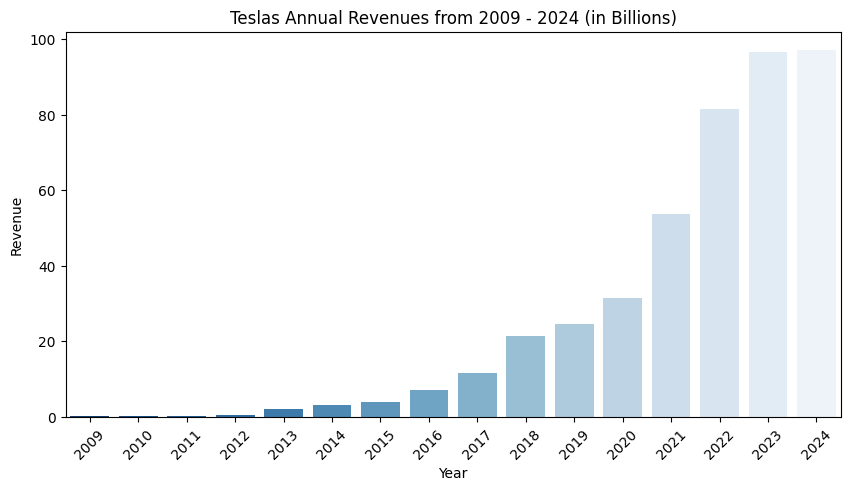

In [15]:
plt.figure(figsize=(10, 5))
sns.barplot(x=data_df['Date'], y=data_df['Revenue'], hue=data_df['Date'], palette='Blues_r')

plt.title('Teslas Annual Revenues from 2009 - 2024 (in Billions)')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

In [23]:
plt.figure(figsize=(15, 5))
data_df['Percentage_Change'] = data_df['Percentage_Change'].str.replace('%', '', regex=False).str.strip()
data_df['Percentage_Change'].replace('', pd.NA, inplace=True)
data_df['Percentage_Change'] = data_df['Percentage_Change'].astype(float)
sns.regplot(x=data_df['Percentage_Change'], y=data_df['Revenue'], scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

plt.title('Teslas Revenue vs Percentage Change')
plt.xlabel('Percentage Change')
plt.ylabel('Revenue')
plt.show()

/tmp/ipykernel_23639/149162636.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_df['Percentage_Change'].replace('', pd.NA, inplace=True)


TypeError: float() argument must be a string or a real number, not 'NAType'

<Figure size 1500x500 with 0 Axes>